<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-data" data-toc-modified-id="Import-Libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Selecting-Best-model" data-toc-modified-id="Selecting-Best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Best model</a></span></li><li><span><a href="#Finalizing-and-Saving-Model" data-toc-modified-id="Finalizing-and-Saving-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizing and Saving Model</a></span></li></ul></div>

## Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
# For visualization
from IPython.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
#base = pd.read_csv('https://raw.githuusercontentb.com/JohnTan38/Zomato/main/HoldoutData.csv')
train = pd.read_csv('https://raw.githubusercontent.com/JohnTan38/Zomato/main/TrainData.csv')
#train = pd.read_csv(r"D:/FormRecognizer/TrainData.csv")

## Exploratory Data Analysis

In [3]:
train.shape

(50891, 21)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50891 entries, 0 to 50890
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 50891 non-null  int64  
 1   Churn                      50891 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  int64  
 4   TotalRecurringCharge       50891 non-null  int64  
 5   DirectorAssistedCalls      50891 non-null  float64
 6   CustomerCareCalls          50891 non-null  float64
 7   ReceivedCalls              50891 non-null  float64
 8   OutboundCalls              50891 non-null  float64
 9   InboundCalls               50891 non-null  float64
 10  MonthsInService            50891 non-null  int64  
 11  UniqueSubs                 50891 non-null  int64  
 12  ActiveSubs                 50891 non-null  int64  
 13  HasCreditCard              50891 non-null  obj

In [5]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,HasCreditCard,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,3000002,Yes,24.00,219,22,0.25,0.0,97.2,0.0,0.0,61,2,1,Yes,1,0,4,0,1-Highest,Suburban,Professional
1,3000010,Yes,16.99,10,17,0.00,0.0,0.0,0.0,0.0,58,1,1,Yes,0,0,5,0,4-Medium,Suburban,Professional
2,3000014,No,38.00,8,38,0.00,0.0,0.4,0.3,0.0,60,1,1,Yes,0,0,6,0,3-Good,Town,Crafts
3,3000022,No,82.28,1312,75,1.24,4.3,200.3,370.3,147.0,59,2,2,Yes,0,0,6,0,4-Medium,Other,Other
4,3000026,Yes,17.14,0,17,0.00,0.0,0.0,0.0,0.0,53,2,2,Yes,0,0,9,1,1-Highest,Other,Professional


In [4]:
# Check columns list and missing values
train.replace(np.nan,0)
train.dropna(axis=0, inplace=True)
train.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
CustomerCareCalls            0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
HasCreditCard                0
RetentionCalls               0
RetentionOffersAccepted      0
IncomeGroup                  0
AdjustmentsToCreditRating    0
CreditRating                 0
PrizmCode                    0
Occupation                   0
dtype: int64

In [5]:
train.describe(include =['object'])

,Churn,HasCreditCard,CreditRating,PrizmCode,Occupation
count,50891,50891,50891,50891,50891
unique,2,2,7,4,8
top,No,Yes,2-High,Other,Other
freq,36250,34397,18992,24566,37526


In [6]:
train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating
count,5.089100e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.00000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000
mean,3.201611e+06,58.834492,525.653416,46.830088,0.895229,1.872987,114.971453,25.40470,8.190515,18.716197,1.531744,1.353854,0.037020,0.018235,4.324163,0.053683
std,1.166734e+05,44.507336,529.871063,23.848871,2.228546,5.101041,166.526538,35.17331,16.675776,9.769439,1.224428,0.675568,0.205746,0.142341,3.138110,0.382084
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100484e+06,33.610000,158.000000,30.000000,0.000000,0.000000,8.500000,3.30000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201226e+06,48.460000,366.000000,45.000000,0.250000,0.000000,52.900000,13.70000,2.000000,16.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,3.304720e+06,71.065000,723.000000,60.000000,0.990000,1.700000,153.800000,34.00000,9.300000,24.000000,2.000000,2.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,7359.000000,400.000000,159.390000,327.300000,2692.400000,644.30000,519.300000,61.000000,196.000000,53.000000,4.000000,3.000000,9.000000,25.000000


In [7]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='viridis',axis=None).set_precision(2)

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\1968381217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train.corr()
C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\1968381217.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrMatrix.style.background_gradient(cmap='viridis',axis=None).set_precision(2)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating
CustomerID,1.00,0.00,0.09,0.05,-0.00,0.12,0.04,0.04,0.03,-0.76,-0.02,-0.04,-0.06,-0.05,-0.14,-0.17
MonthlyRevenue,0.00,1.00,0.71,0.63,0.41,0.19,0.61,0.50,0.37,-0.00,-0.01,-0.04,0.01,0.02,-0.08,0.03
MonthlyMinutes,0.09,0.71,1.00,0.58,0.39,0.38,0.83,0.69,0.56,-0.07,-0.03,-0.07,0.01,0.02,-0.14,0.05
TotalRecurringCharge,0.05,0.63,0.58,1.00,0.31,0.15,0.48,0.41,0.31,-0.05,-0.02,-0.06,-0.02,-0.00,-0.08,0.04
DirectorAssistedCalls,-0.00,0.41,0.39,0.31,1.00,0.09,0.28,0.32,0.19,0.02,-0.00,-0.01,0.01,0.01,-0.02,0.02
CustomerCareCalls,0.12,0.19,0.38,0.15,0.09,1.00,0.30,0.29,0.22,-0.11,-0.05,-0.09,0.03,0.02,-0.12,0.02
ReceivedCalls,0.04,0.61,0.83,0.48,0.28,0.30,1.00,0.65,0.62,-0.02,-0.02,-0.05,0.01,0.01,-0.13,0.04
OutboundCalls,0.04,0.50,0.69,0.41,0.32,0.29,0.65,1.00,0.72,-0.02,0.02,0.01,0.01,0.01,-0.10,0.04
InboundCalls,0.03,0.37,0.56,0.31,0.19,0.22,0.62,0.72,1.00,-0.01,0.05,0.07,0.00,0.01,-0.10,0.04
MonthsInService,-0.76,-0.00,-0.07,-0.05,0.02,-0.11,-0.02,-0.02,-0.01,1.00,0.02,0.03,0.07,0.05,0.14,0.22


In [8]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\2459635435.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))


[]

In [9]:
# Drop highly correlated features 
train.drop(to_drop, axis=1, inplace=True)

In [10]:
corr_cat = train.select_dtypes(include=['object']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_cat.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\2033281267.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_cat.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,Churn,HasCreditCard,CreditRating,PrizmCode,Occupation
Churn,1.00,-0.01,0.03,-0.01,-0.00
HasCreditCard,-0.01,1.00,0.12,0.12,0.11
CreditRating,0.03,0.12,1.00,0.05,0.02
PrizmCode,-0.01,0.12,0.05,1.00,0.06
Occupation,-0.00,0.11,0.02,0.06,1.00


C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\2842636189.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


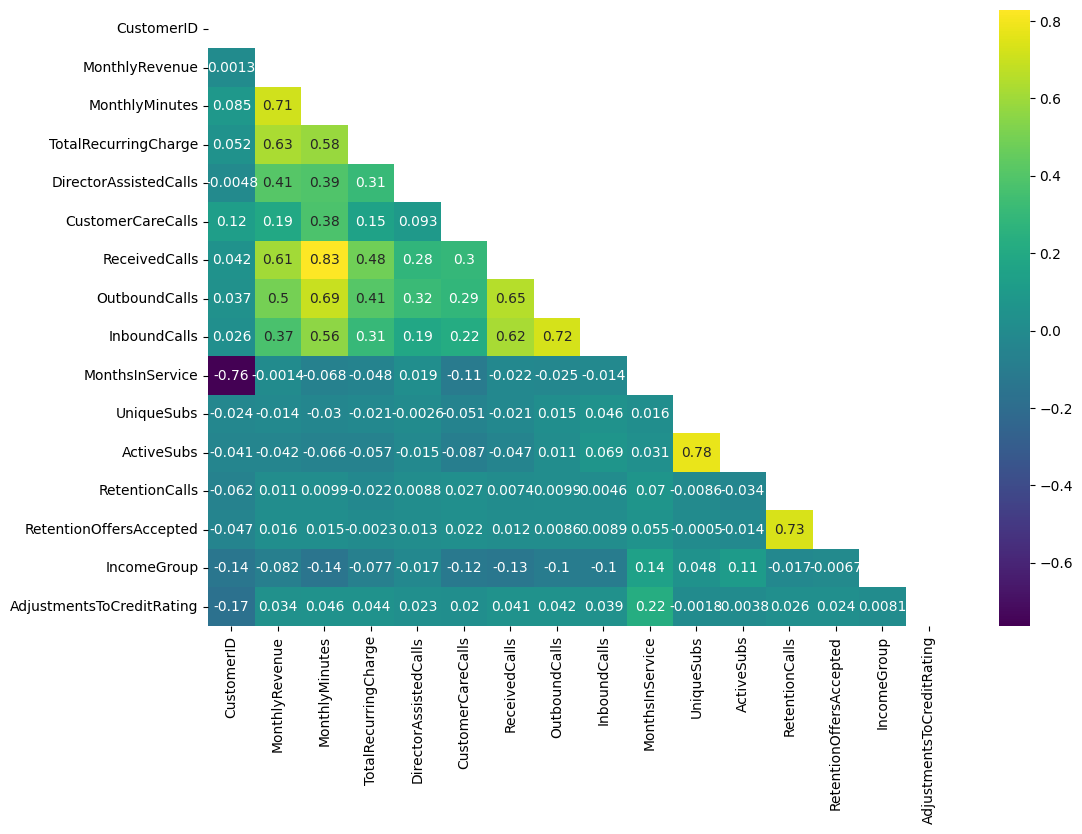

In [11]:
train_cor = train.copy()
plt.figure(figsize=(12,8))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.show()

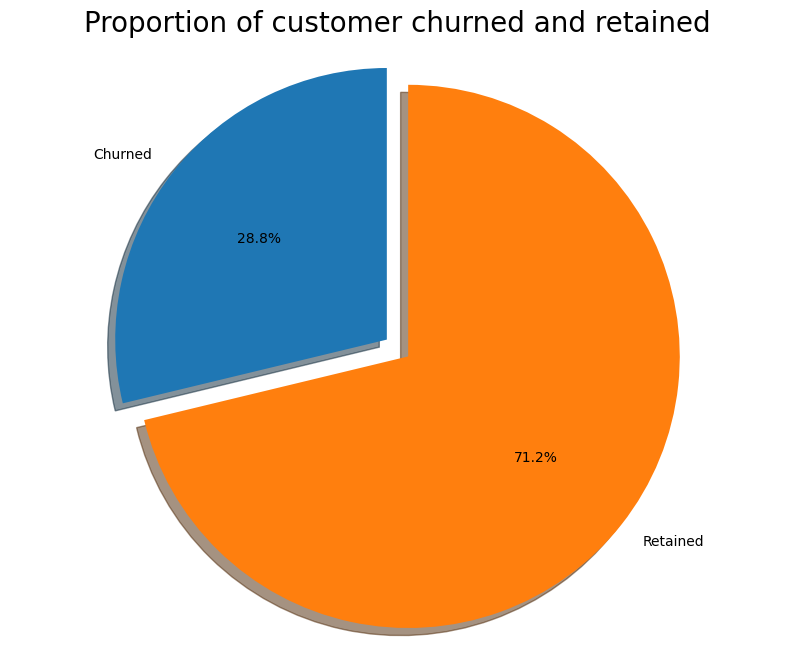

In [12]:
labels = 'Churned', 'Retained'
sizes = [train.Churn[train['Churn']=='Yes'].count(), train.Churn[train['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

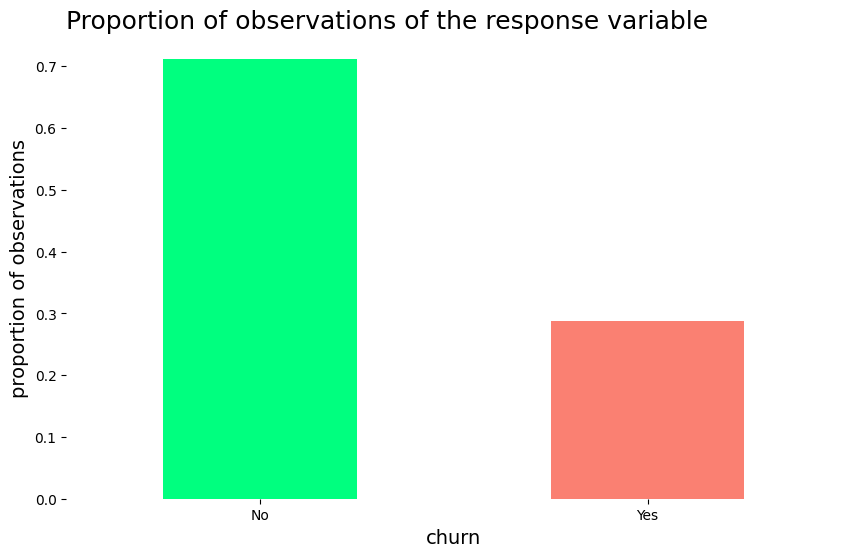

In [13]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = train['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [14]:
train_transformed = train.copy()
train_1 = train.copy()

# label encoding (binary variables)
label_encoding_columns = ['CreditRating', 'PrizmCode', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'CreditRating':
        train_transformed[column] = train_transformed[column].map({'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7})
    #else: 
        #train_transformed[column] = train_transformed[column].map({'Yes': 1, 'No': 0})

for column in label_encoding_columns:
    if column == 'Churn':
        train[column] = train[column].map({'Yes': 1, 'No': 0})
    elif column == 'CreditRating':
        train[column] = train[column].map({'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7})
    elif column == 'PrizmCode':
        train[column] = train[column].map({'Town': 1, 'Suburban': 2, 'Rural': 3, 'Other': 4})
    else:
        pass

train['Occupation'] = train['Occupation'].map({'Clerical': 1, 'Crafts': 2, 'Homemaker': 3, 'Other': 4, 'Professional': 5, 'Retired': 6, 'Self': 7, 'Student': 8})

In [15]:
train.drop('HasCreditCard', axis=1, inplace=True)

In [16]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,3000002,1,24.00,219,22,0.25,0.0,97.2,0.0,0.0,61,2,1,1,0,4,0,1,2,5
1,3000010,1,16.99,10,17,0.00,0.0,0.0,0.0,0.0,58,1,1,0,0,5,0,4,2,5
2,3000014,0,38.00,8,38,0.00,0.0,0.4,0.3,0.0,60,1,1,0,0,6,0,3,1,2
3,3000022,0,82.28,1312,75,1.24,4.3,200.3,370.3,147.0,59,2,2,0,0,6,0,4,4,4
4,3000026,1,17.14,0,17,0.00,0.0,0.0,0.0,0.0,53,2,2,0,0,9,1,1,4,5


## EDA and Visualization

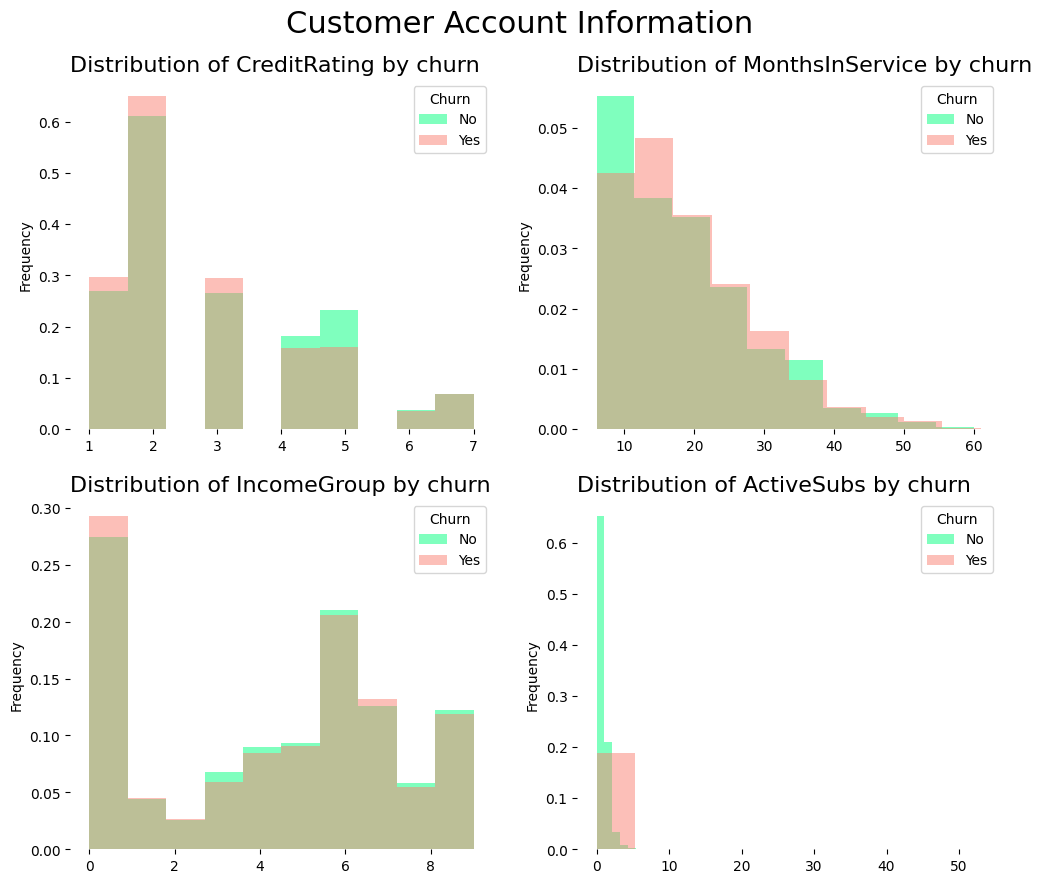

In [17]:
import math
def histogram_plots(columns_to_plot, super_title):
    
     
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        train_transformed[train_transformed['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        train_transformed[train_transformed['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['CreditRating', 'MonthsInService', 'IncomeGroup', 'ActiveSubs']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')


<AxesSubplot: xlabel='MonthsInService', ylabel='count'>

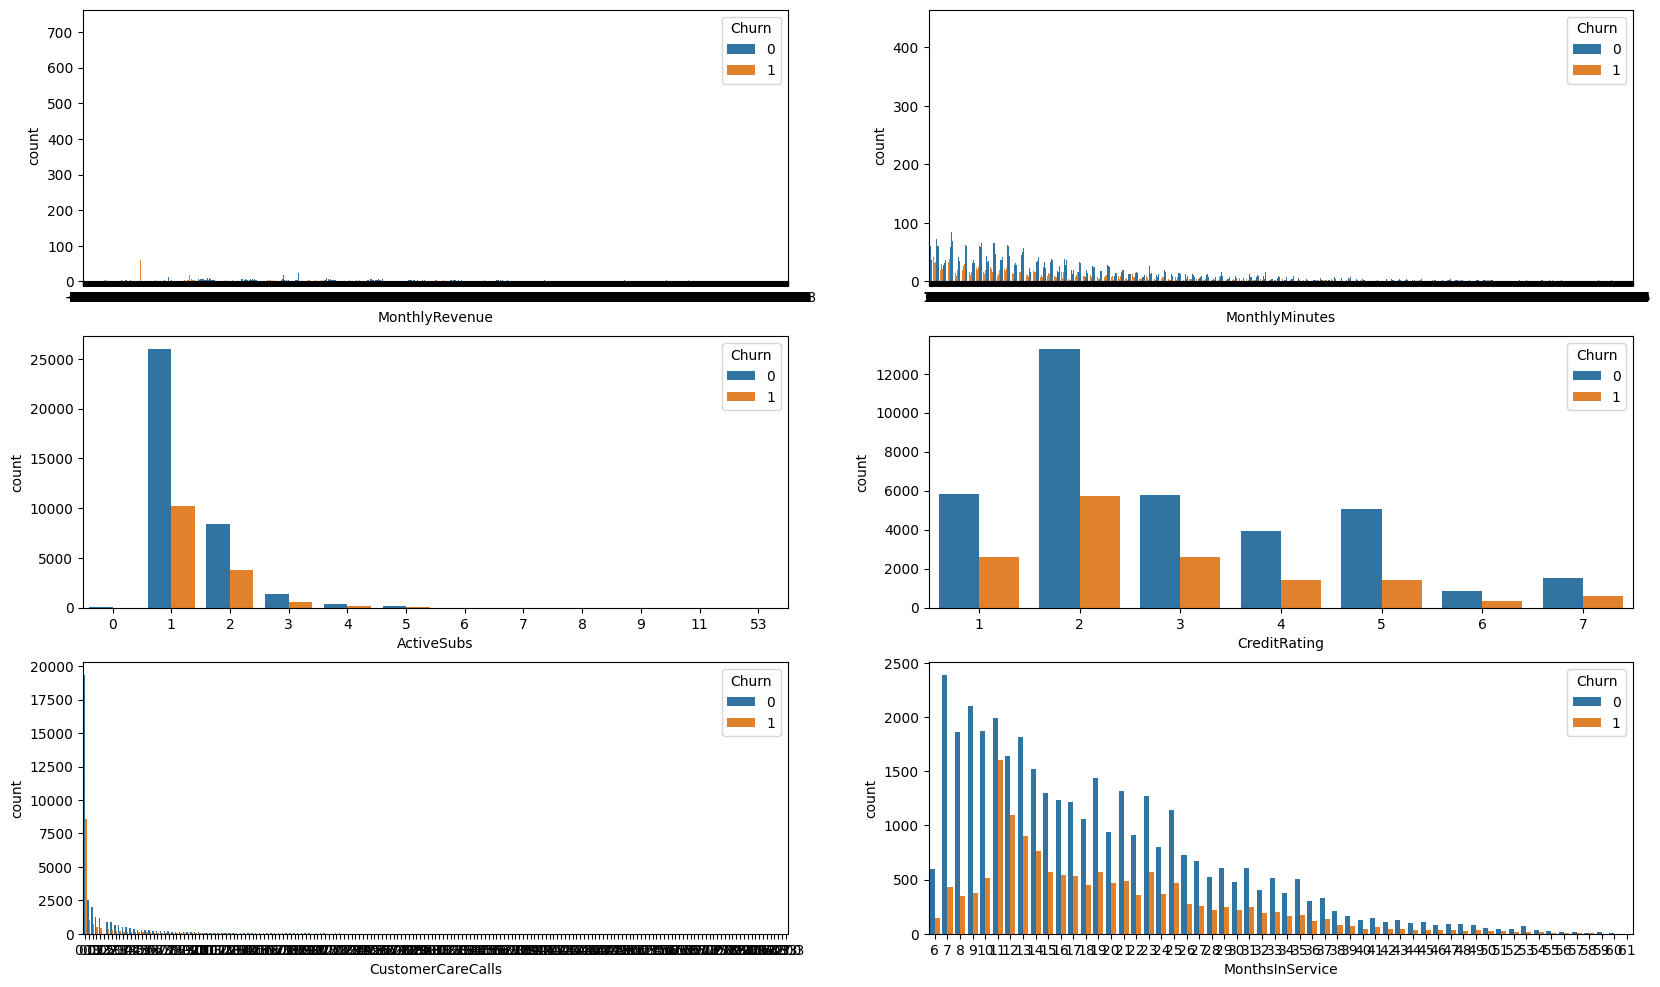

In [20]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='MonthlyRevenue', hue = 'Churn',data = train, ax=axarr[0][0])
sns.countplot(x='MonthlyMinutes', hue = 'Churn',data = train, ax=axarr[0][1])
sns.countplot(x='ActiveSubs', hue = 'Churn',data = train, ax=axarr[1][0])
sns.countplot(x='CreditRating', hue = 'Churn',data = train, ax=axarr[1][1])
sns.countplot(x='CustomerCareCalls', hue = 'Churn',data = train, ax=axarr[2][0])
sns.countplot(x='MonthsInService', hue = 'Churn',data = train, ax=axarr[2][1])

In [18]:
for col in train.select_dtypes(exclude=['object']):
    print("\n","#"*15, "Descriptive statistics for :",col,"#"*15)
    display(train.groupby(["Churn"])[col].describe())


 ############### Descriptive statistics for : CustomerID ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,3.204625e+06,118841.930385,3000014.0,3100875.0,3203944.0,3313040.0,3399974.0
1,14641.0,3.194148e+06,110773.755863,3000002.0,3099362.0,3195614.0,3285962.0,3399946.0



 ############### Descriptive statistics for : Churn ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14641.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0



 ############### Descriptive statistics for : MonthlyRevenue ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,59.173538,44.504027,-6.17,34.10,48.815,71.6175,1223.38
1,14641.0,57.995041,44.505934,0.00,32.52,47.520,69.9500,861.11



 ############### Descriptive statistics for : MonthlyMinutes ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,542.546483,538.816505,0.0,170.0,381.0,743.0,7359.0
1,14641.0,483.827471,504.634392,0.0,132.0,330.0,667.0,5410.0



 ############### Descriptive statistics for : TotalRecurringCharge ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,47.759117,24.125276,-9.0,30.0,45.0,60.0,400.0
1,14641.0,44.529882,22.990134,-11.0,30.0,44.0,55.0,338.0



 ############### Descriptive statistics for : DirectorAssistedCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.922870,2.329606,0.0,0.0,0.25,0.99,159.39
1,14641.0,0.826793,1.954381,0.0,0.0,0.25,0.74,45.79



 ############### Descriptive statistics for : CustomerCareCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.986717,5.345584,0.0,0.0,0.0,1.7,327.3
1,14641.0,1.591401,4.425574,0.0,0.0,0.0,1.3,172.3



 ############### Descriptive statistics for : ReceivedCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,118.867145,169.766327,0.0,9.6,56.2,158.6,2692.4
1,14641.0,105.326016,157.812200,0.0,5.9,45.4,140.9,2619.3



 ############### Descriptive statistics for : OutboundCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,26.118011,35.669719,0.0,3.7,14.0,34.7,644.3
1,14641.0,23.638597,33.849554,0.0,2.3,12.3,31.7,520.3



 ############### Descriptive statistics for : InboundCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,8.549503,17.233981,0.0,0.0,2.3,9.7,519.3
1,14641.0,7.301687,15.169827,0.0,0.0,1.7,8.0,298.3



 ############### Descriptive statistics for : MonthsInService ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,18.602869,9.946682,6.0,11.0,16.0,24.0,60.0
1,14641.0,18.996790,9.310494,6.0,12.0,17.0,24.0,61.0



 ############### Descriptive statistics for : UniqueSubs ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.505490,0.843378,1.0,1.0,1.0,2.0,12.0
1,14641.0,1.596749,1.855895,1.0,1.0,1.0,2.0,196.0



 ############### Descriptive statistics for : ActiveSubs ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.347641,0.637353,0.0,1.0,1.0,2.0,11.0
1,14641.0,1.369237,0.761788,0.0,1.0,1.0,2.0,53.0



 ############### Descriptive statistics for : RetentionCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.028497,0.180237,0.0,0.0,0.0,0.0,3.0
1,14641.0,0.058124,0.257077,0.0,0.0,0.0,0.0,4.0



 ############### Descriptive statistics for : RetentionOffersAccepted ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.015090,0.129590,0.0,0.0,0.0,0.0,3.0
1,14641.0,0.026023,0.169596,0.0,0.0,0.0,0.0,3.0



 ############### Descriptive statistics for : IncomeGroup ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,4.348662,3.127163,0.0,1.0,5.0,7.0,9.0
1,14641.0,4.263507,3.164344,0.0,0.0,5.0,7.0,9.0



 ############### Descriptive statistics for : AdjustmentsToCreditRating ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.057793,0.411359,0.0,0.0,0.0,0.0,25.0
1,14641.0,0.043508,0.297219,0.0,0.0,0.0,0.0,9.0



 ############### Descriptive statistics for : CreditRating ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,2.931917,1.593716,1.0,2.0,2.0,4.0,7.0
1,14641.0,2.771122,1.544646,1.0,2.0,2.0,4.0,7.0



 ############### Descriptive statistics for : PrizmCode ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,2.867421,1.173197,1.0,2.0,3.0,4.0,4.0
1,14641.0,2.855338,1.180025,1.0,2.0,3.0,4.0,4.0



 ############### Descriptive statistics for : Occupation ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,4.164166,0.880577,1.0,4.0,4.0,4.0,8.0
1,14641.0,4.154293,0.875847,1.0,4.0,4.0,4.0,8.0


<AxesSubplot: xlabel='Churn', ylabel='CreditRating'>

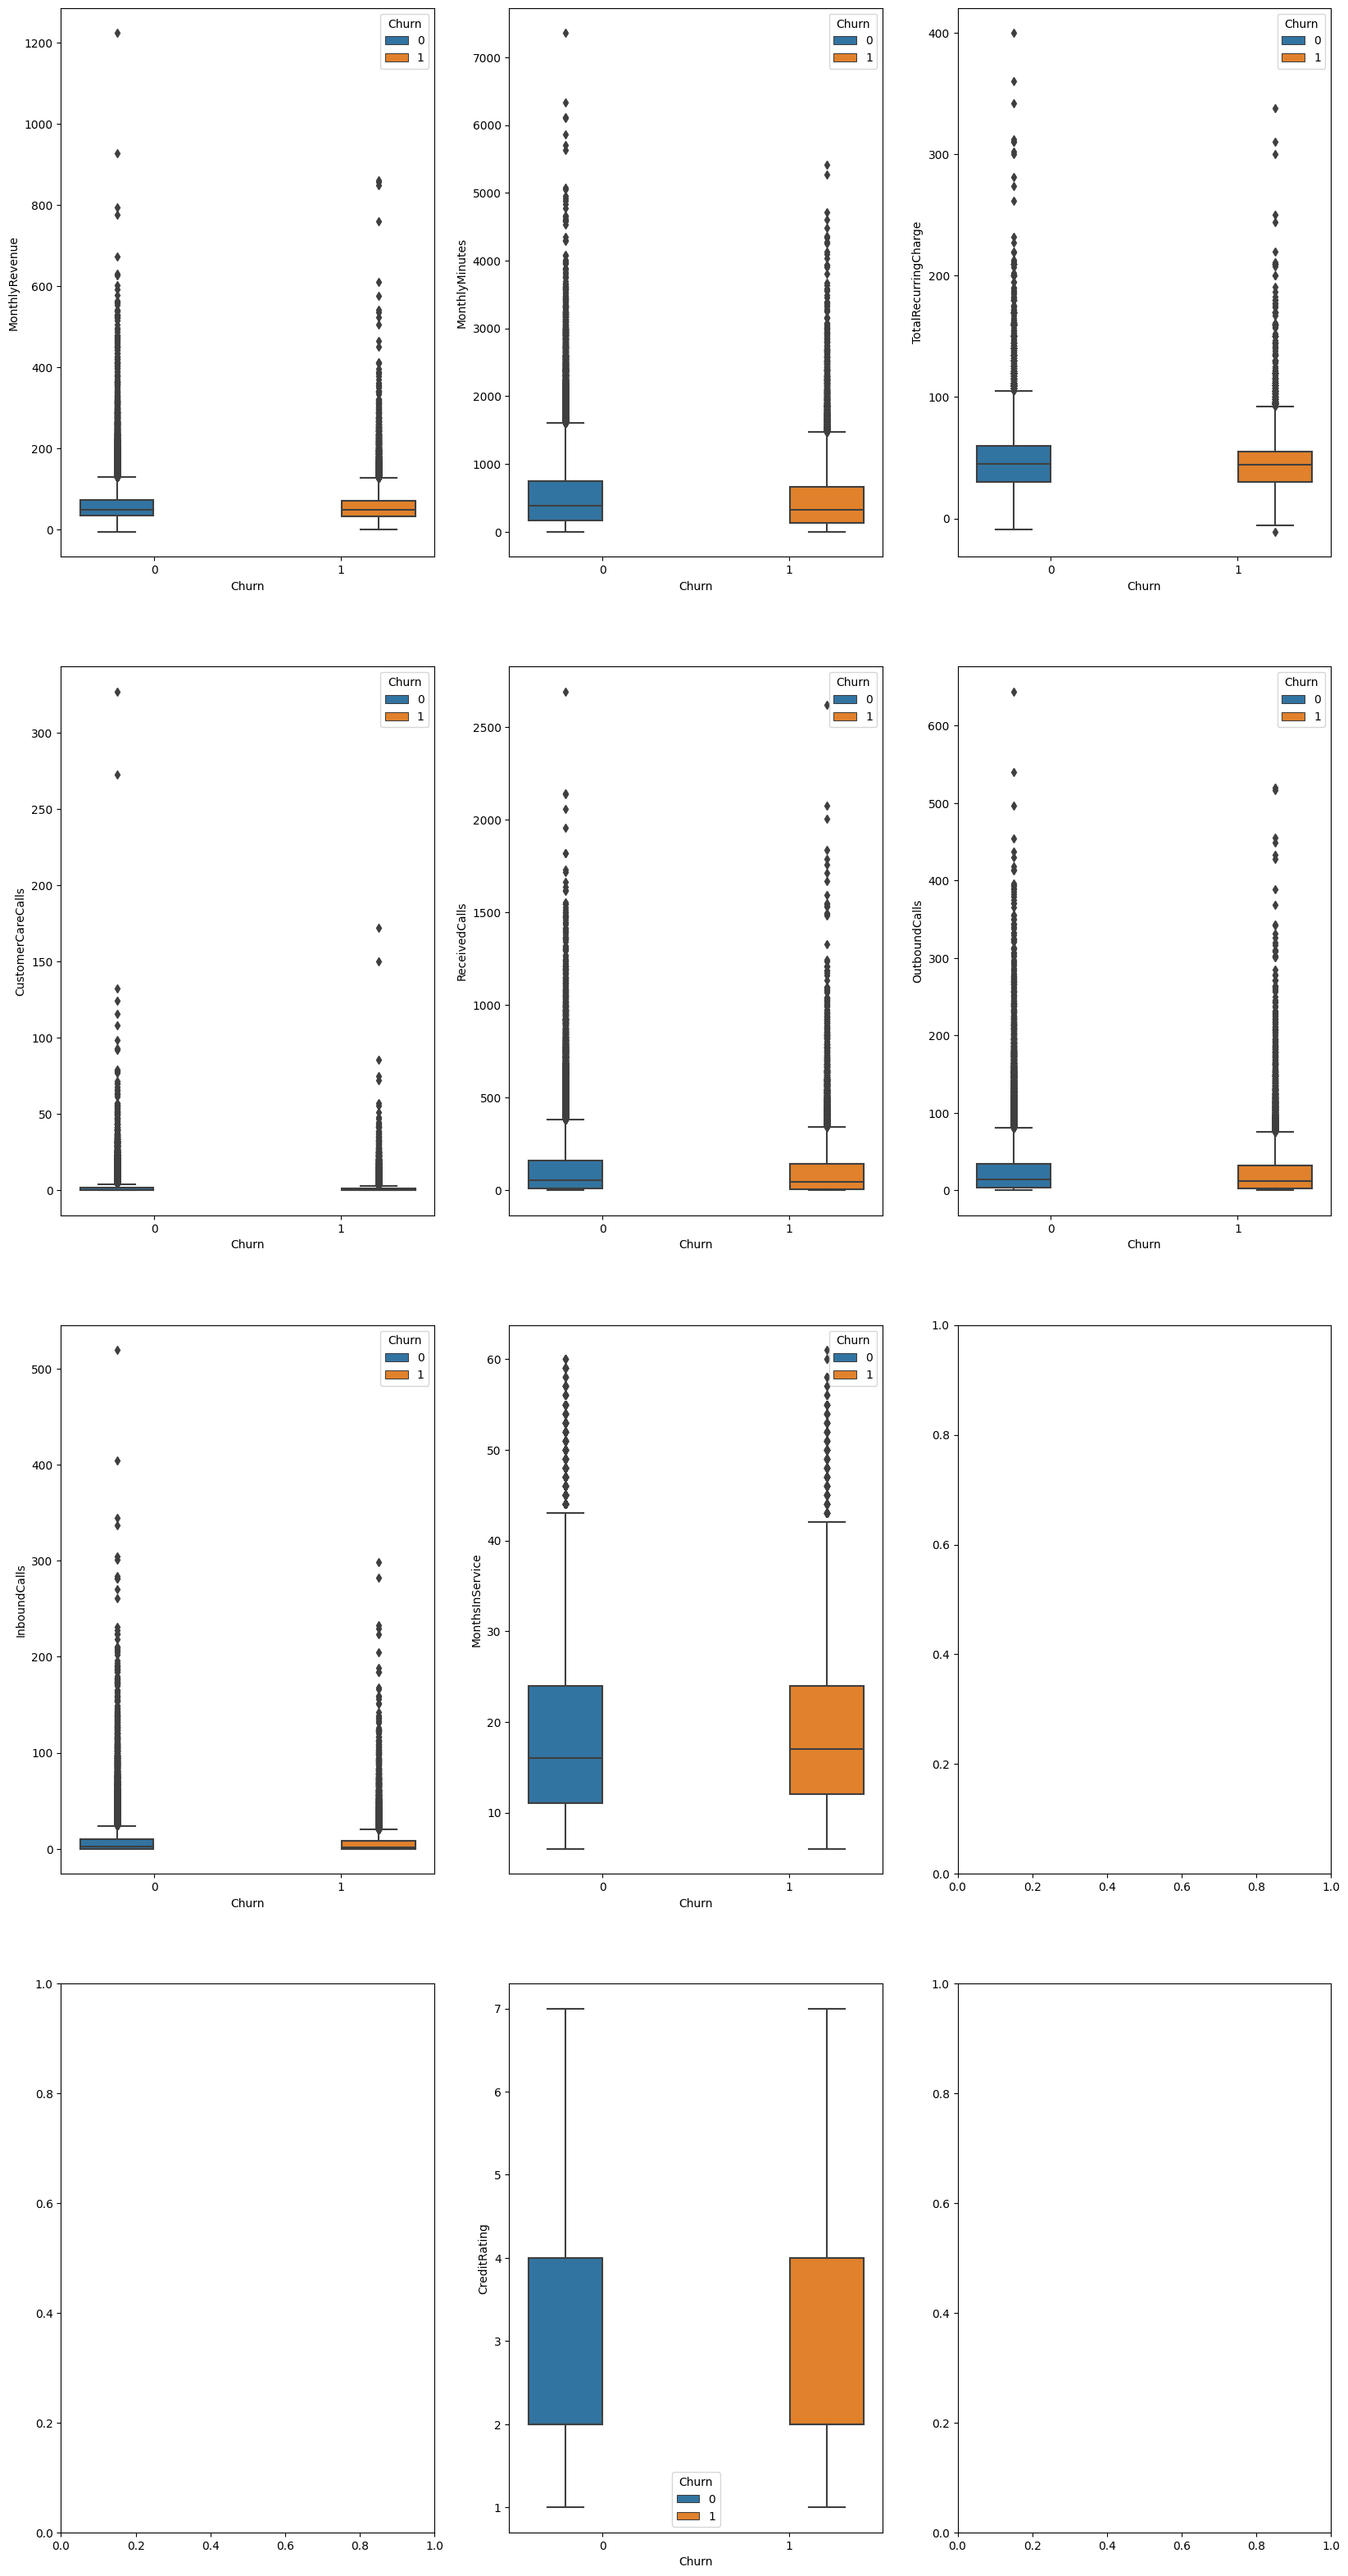

In [19]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(4, 3, figsize=(20, 40))
sns.boxplot(y='MonthlyRevenue',x = 'Churn', hue = 'Churn',data = train, ax=axarr[0][0])
sns.boxplot(y='MonthlyMinutes',x = 'Churn', hue = 'Churn',data = train , ax=axarr[0][1])
sns.boxplot(y='TotalRecurringCharge',x = 'Churn', hue = 'Churn',data = train, ax=axarr[0][2])
sns.boxplot(y='CustomerCareCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][0])
sns.boxplot(y='ReceivedCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][1])
sns.boxplot(y='OutboundCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][2])
sns.boxplot(y='InboundCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[2][0])
sns.boxplot(y='MonthsInService',x = 'Churn', hue = 'Churn',data = train, ax=axarr[2][1])
sns.boxplot(y='CreditRating',x = 'Churn', hue = 'Churn',data = train, ax=axarr[3][1])

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\3582131434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MonthsInService'], ax=ax1)


<AxesSubplot: xlabel='MonthsInService'>

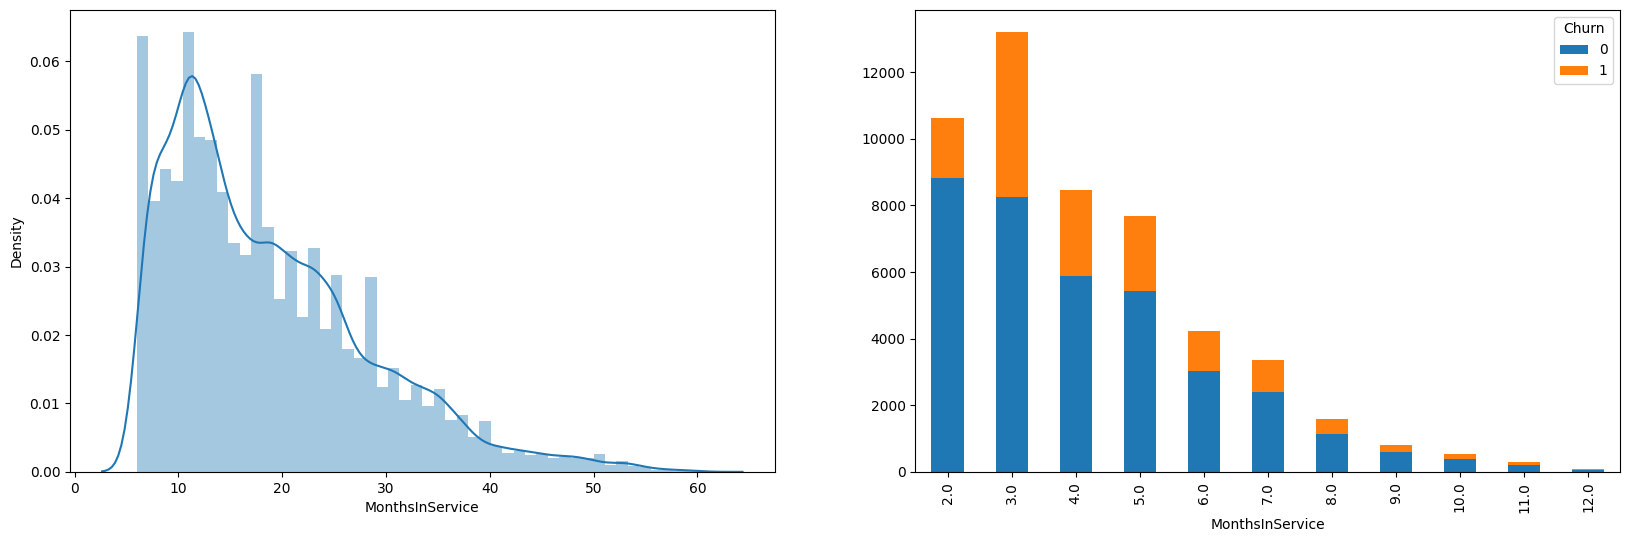

In [20]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(train['MonthsInService'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((train['MonthsInService']/1)/5),30), bins = bins, labels = labels ), train['Churn']).plot(kind='bar', stacked=True, ax = ax2)

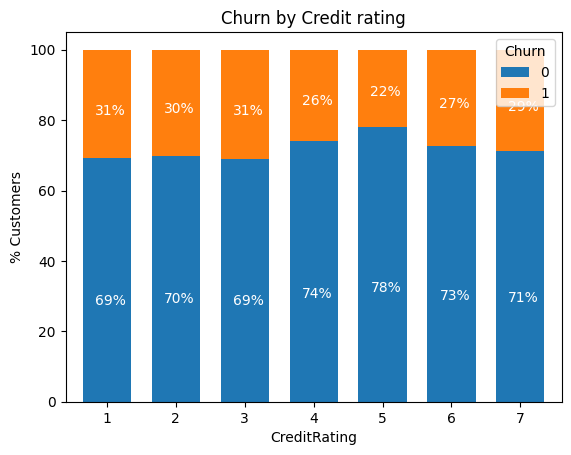

In [21]:
credit_churn = train.groupby(['CreditRating','Churn']).size().unstack()

ax = (credit_churn.T*100.0 / credit_churn.T.sum()).T.plot(kind='bar',width = 0.7,stacked = True,rot = 0) 
                                                                
#ax.yaxis.set_major_formatter(PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Credit rating')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\776191205.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.TotalRecurringCharge[(train["Churn"] == 0)], shade=True)
C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_14232\776191205.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train.TotalRecurringCharge[(train["Churn"] == 1) ], ax =ax, shade= True)


Text(0.5, 1.0, 'Distribution of Total Recurring Charges by churn')

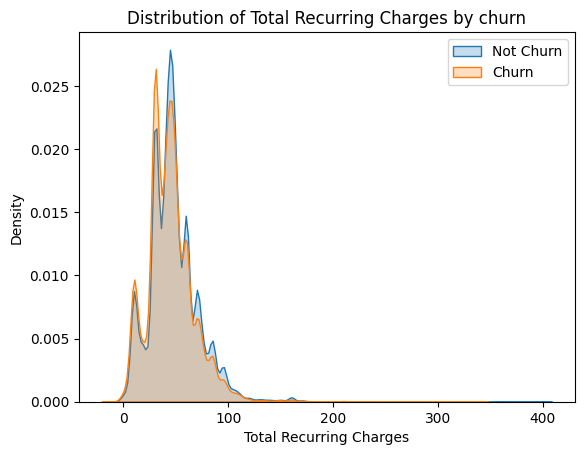

In [22]:
ax = sns.kdeplot(train.TotalRecurringCharge[(train["Churn"] == 0)], shade=True)
ax = sns.kdeplot(train.TotalRecurringCharge[(train["Churn"] == 1) ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Total Recurring Charges')
ax.set_title('Distribution of Total Recurring Charges by churn')

In [23]:
# min-max normalization (numeric variables)
min_max_columns = ['MonthlyRevenue', 'MonthlyMinutes']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = train[column].min()
        # maximum value of the column
        max_column = train[column].max()
        # min max scaler
        train[column] = (train[column] - min_column) / (max_column - min_column)

In [24]:
# select independent variables
X = train.drop(columns='Churn')

# select dependent variables
y = train.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'CustomerCareCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
       'IncomeGroup', 'AdjustmentsToCreditRating', 'CreditRating', 'PrizmCode',
       'Occupation'],
      dtype='object')
Churn


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

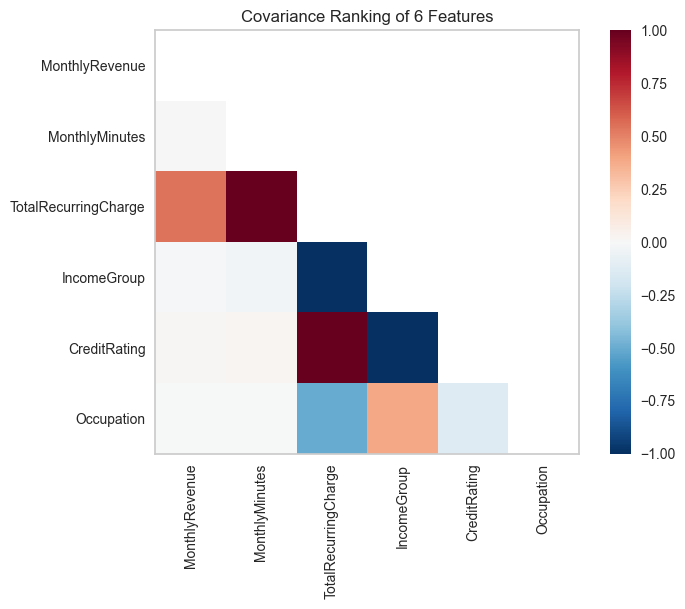

<AxesSubplot: title={'center': 'Covariance Ranking of 6 Features'}>

In [26]:
train_1 = train.copy()
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pca import PCADecomposition
from sklearn import datasets

features = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'IncomeGroup', 'CreditRating', 'Occupation']

X = train_1[features]
y = train_1.Churn

#params = {'scale': True, 'color': y, 'proj_dim':3, 'colormap':'RdBu_r'}
#visualizer = PCADecomposition(**params)
visualizer = Rank2D(features=features, algorithm='covariance')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

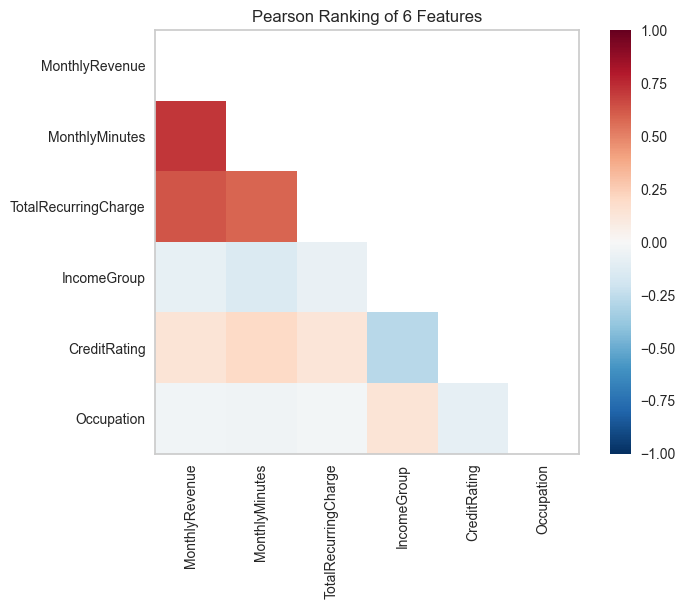

<AxesSubplot: title={'center': 'Pearson Ranking of 6 Features'}>

In [27]:
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

# Feature Importances with Lasso and Ridge

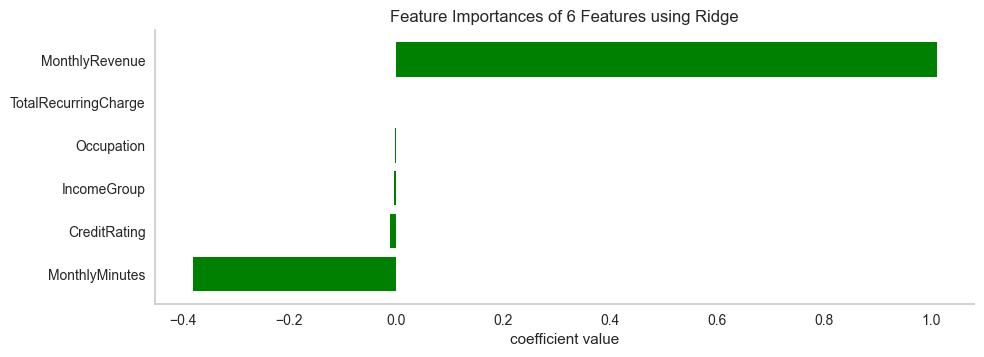

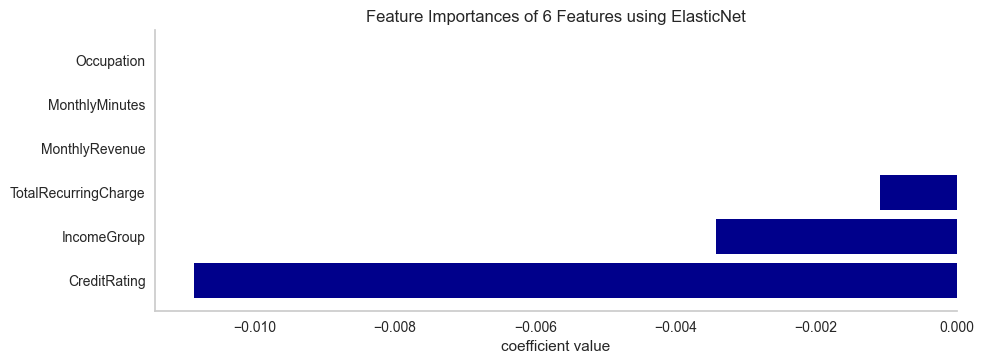

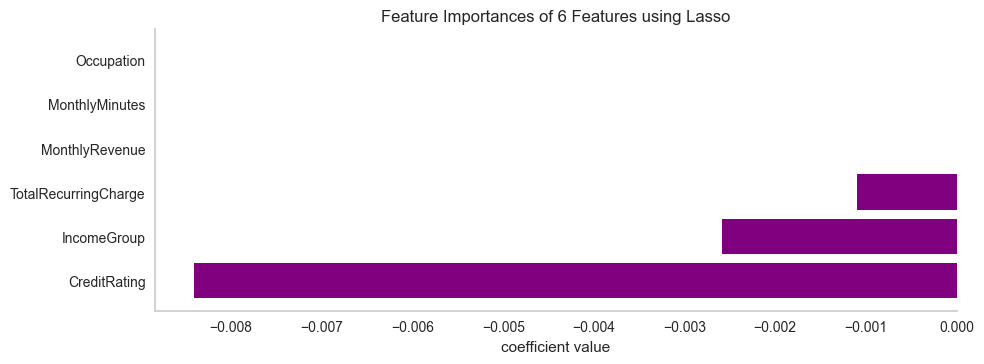

<AxesSubplot: title={'center': 'Feature Importances of 6 Features using Lasso'}, xlabel='coefficient value'>

In [28]:
# Visualizing Ridge, Lasso and ElasticNet feature selection models side by side for comparison
from cycler import cycler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
from yellowbrick.model_selection import FeatureImportances

# Ridge
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['green'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(311)
labels = features
viz = FeatureImportances(Ridge(alpha=0.1), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

# ElasticNet
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['darkblue'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
labels = features
viz = FeatureImportances(ElasticNet(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

# Lasso
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
labels = features
viz = FeatureImportances(Lasso(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

In [29]:
# Creating a function to visualize estimators
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
def visual_model_selection(X, y, estimator):
    visualizer = ClassificationReport(estimator, classes=['0', '1'], cmap='PRGn')
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.show()

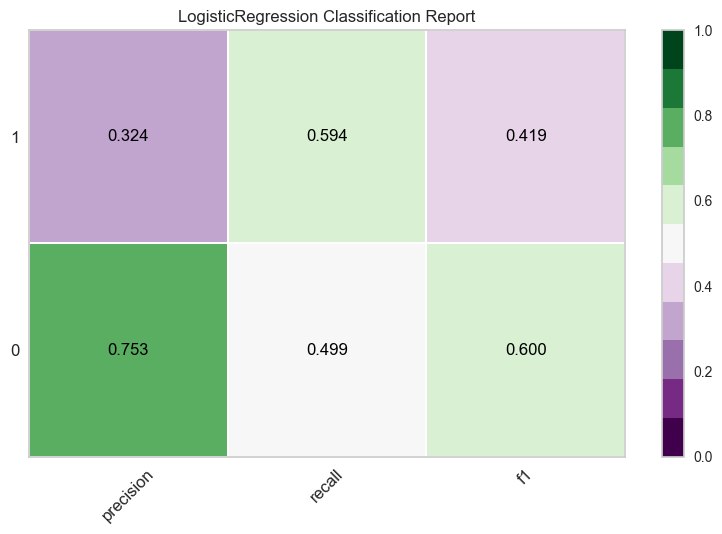

In [30]:
from sklearn.linear_model import LogisticRegression
visual_model_selection(X, y, LogisticRegression(class_weight='balanced'))


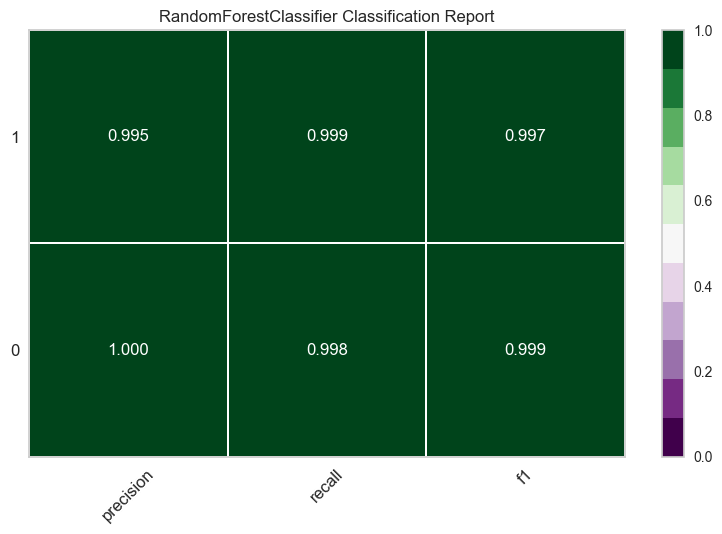

In [31]:
from sklearn.ensemble import RandomForestClassifier
visual_model_selection(X, y, RandomForestClassifier(class_weight='balanced'))

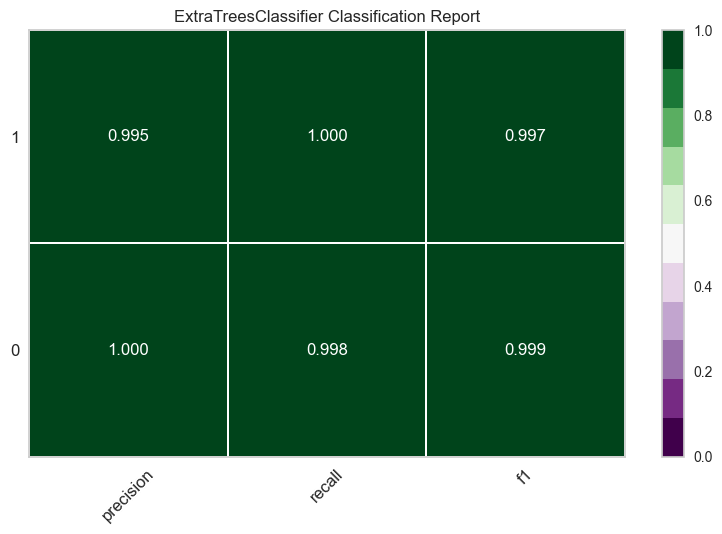

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
visual_model_selection(X, y, ExtraTreesClassifier(class_weight='balanced'))

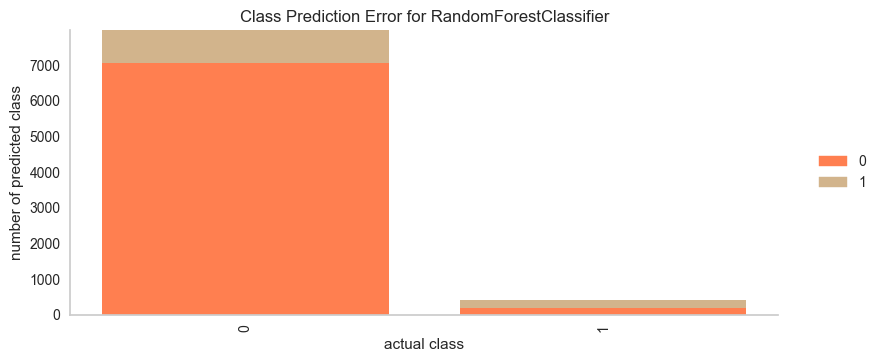

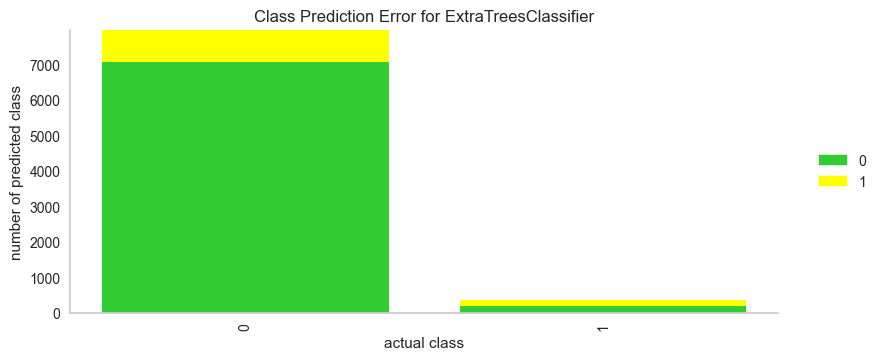

In [33]:
# Visualizaing class prediction error for Random Forest Classifier model
classes = ['0', '1']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['coral', 'tan', 'darkred'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
visualizer = ClassPredictionError(RandomForestClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.show()

# Visualizaing class prediction error for Extra Trees Classifier model
classes = ['0', '1']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['limegreen', 'yellow', 'orange'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
visualizer = ClassPredictionError(ExtraTreesClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.show()

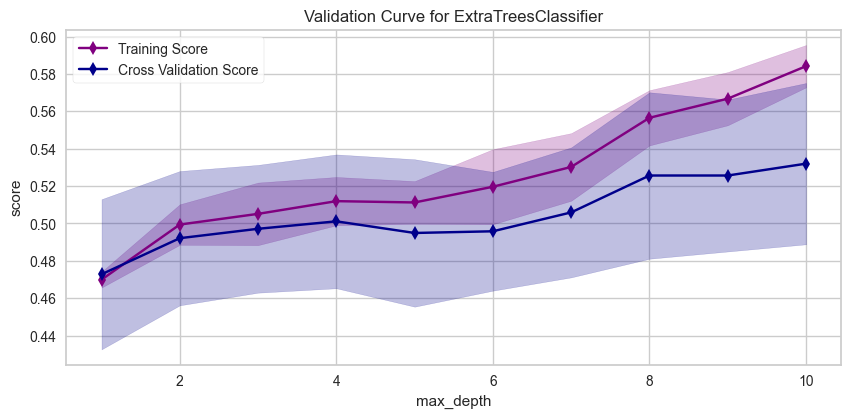

<AxesSubplot: title={'center': 'Validation Curve for ExtraTreesClassifier'}, xlabel='max_depth', ylabel='score'>

In [38]:
# Model Optimization. Performing Hyperparameter tuning 
# Validation Curve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple', 'darkblue'])

fig = plt.gcf()
fig.set_size_inches(10,20)
ax = plt.subplot(411)
viz = ValidationCurve(ExtraTreesClassifier(class_weight='balanced'), ax=ax, param_name="max_depth", param_range=np.arange(1, 11), cv=3, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()


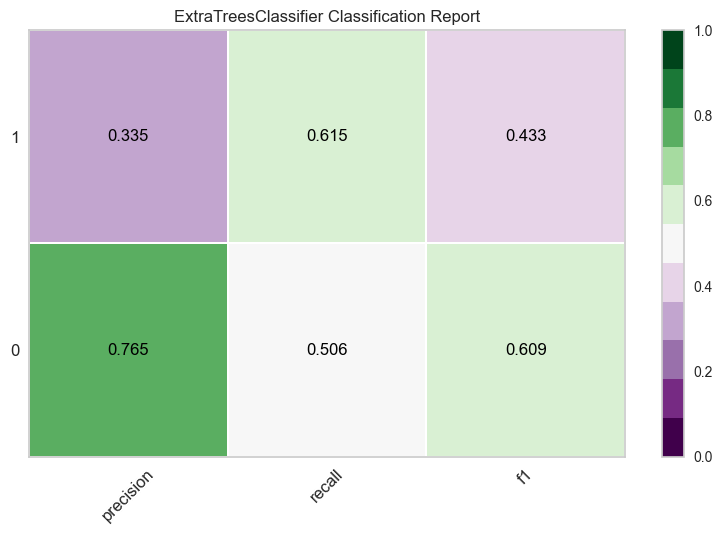

In [39]:
visual_model_selection(X, y, ExtraTreesClassifier(class_weight='balanced', max_depth=7))
#https://github.com/DistrictDataLabs/yellowbrick/blob/develop/examples/iguk1987/Yellowbrick_Tour.ipynb

c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:512: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_6532\303034946.py:50: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  np.where(scores==np.percentile(scores, p, interpolation='nearest'))[0][0]


<AxesSubplot: title={'center': 'Intercluster Distance Map (via Multidimensional Scaling)'}, xlabel='PC2', ylabel='PC1'>

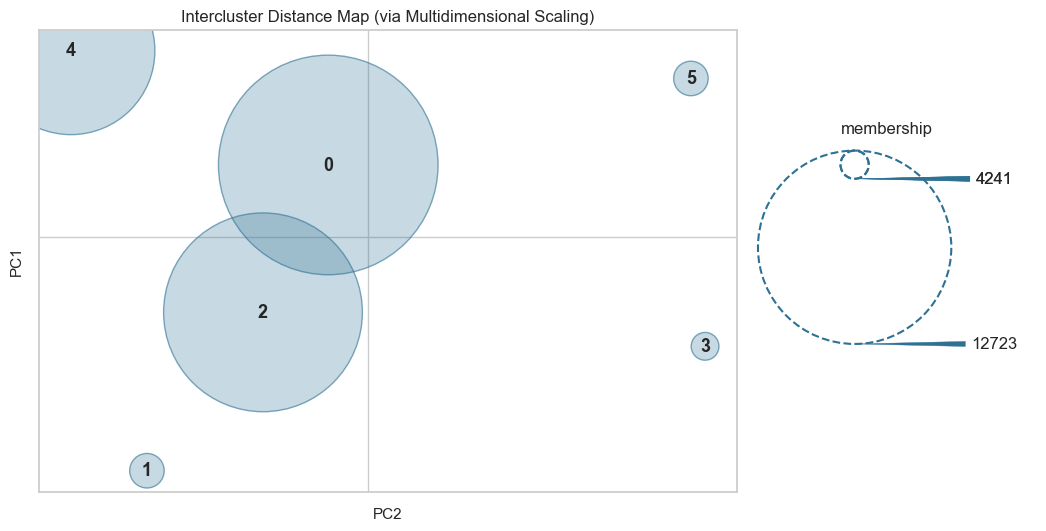

In [40]:
import yellowbrick as yb 
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from functools import partial
from sklearn.datasets import make_blobs as sk_make_blobs
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

N_SAMPLES = 50891
N_FEATURES = 6
SHUFFLE = True 

# Make blobs partial 
make_blobs = partial(sk_make_blobs, n_samples=N_SAMPLES, n_features=N_FEATURES, shuffle=SHUFFLE)

def prop_to_size(prop, mi=0, ma=5, power=0.5):
    """
    Scale a property to be used as a size 
    """
    prop = np.asarray(prop)

    return mi + (ma - mi)*(((prop - prop.min()) / (prop.max() - prop.min()))**power)

from sklearn.manifold import MDS 

## Make 12 blobs dataset 
X, y = make_blobs(centers=12)

## Fit KMeans model on dataset 
model = KMeans(6).fit(X)

from matplotlib.lines import Line2D

from matplotlib.patches import Circle 

def make_size_legend(scores, areas, ax=None):
    # Create the figure if an axes isn't passed in 
    if ax is None:
        _, ax = plt.subplots()

    ## Compute the sizes of the clusters 
    radii = np.sqrt(areas / np.pi)
    scaled = np.interp(radii, (radii.min(), radii.max()), (.1, 1))
    #print(size, radii)
    
    # Compute the locations of the 25th, 50th, and 75th percentiles of the score 
    indices = np.array([
        np.where(scores==np.percentile(scores, p, interpolation='nearest'))[0][0]
        for p in (25, 50, 75)
    ])
    
    # Draw circles with their various sizes 
    for idx in indices:
        center = (-0.30, 1-scaled[idx])
        c = Circle(center, scaled[idx], facecolor="none", edgecolor="#2e7193", linewidth=1.5, linestyle="--", label="bob")
        ax.add_patch(c)
        
        ax.annotate(
            scores[idx], (-0.30, 1-(2*scaled[idx])), xytext=(1, 1-(2*scaled[idx])), 
            arrowprops=dict(arrowstyle="wedge", color="#2e7193"), va='center', ha='center',
        )
    
    # Draw size legend title 
    ax.text(s="membership", x=0, y=1.2, va='center', ha='center')
    
    ax.set_xlim(-1.4,1.4)
    ax.set_ylim(-1.4,1.4)
    ax.set_xticks([])
    ax.set_yticks([])
    for name in ax.spines:
        ax.spines[name].set_visible(False)
    
    ax.grid(False)
    
    return ax 

def intercluster_distance(model, ax=None):
    # Create the figure if an axes isn't passed in 
    if ax is None:
        fig, ax = plt.subplots(figsize=(9,6))
    else:
        fig = plt.gcf()
    
    ## Get centers 
    ## TODO: is this how sklearn stores centers in all models? 
    C = model.cluster_centers_

    ## Compute the sizes of the clusters 
    scores = np.bincount(model.predict(X))
    size = prop_to_size(scores, 400, 25000)

    ## Use MDS to plot centers 
    Cm = MDS().fit_transform(C)
    ax.scatter(Cm[:,0], Cm[:,1], s=size, c='#2e719344', edgecolor='#2e719399', linewidth=1)

    ## Annotate the clustes with their labels 
    for i, pt in enumerate(Cm):
        ax.text(s=str(i), x=pt[0], y=pt[1], va="center", ha="center", fontweight='bold', size=13)
    
    ## Set the title 
    ax.set_title("Intercluster Distance Map (via Multidimensional Scaling)")
    
    # Create origin grid 
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("PC2")
    ax.set_ylabel("PC1")
    
    # Create a regular legend with target "size" descriptor 
#     handles = tuple([
#         Line2D([0], [0], color="none", marker="o", markersize=i, markerfacecolor='none', markeredgecolor="#999999", markeredgewidth=1, markevery=i)
#         for i in [3,9,18]
#     ])
#     ax.legend([handles], ['membership',], loc='best')

    # Create the size legend on an inner axes 
    lax = fig.add_axes([.9, 0.25, 0.3333, 0.5], frameon=False, facecolor="none")
    make_size_legend(scores, size, lax)
        
    return ax 

intercluster_distance(model)

# Variance Inflation Factor VIF

In [42]:
#VIF
import numpy as np
train_2 = train.copy()
#df_cor = train_2.corr()
#pd.DataFrame(np.linalg.inv(train_2.corr().values), index = df_cor.index, columns=df_cor.columns)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#train = pd.read_csv('https://raw.githubusercontent.com/JohnTan38/Telco-Customer-Churn-Prediction/main/TrainData_clean.csv')

def calculate_vif(df, thresh):
    '''
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df.head(n=30)

calculate_vif(train_2, 3.5)

c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features above VIF threshold:

                     VIF
MonthlyMinutes  4.981324
ReceivedCalls   3.578125
Dropping: MonthlyMinutes
Dropping: ReceivedCalls


,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,1,24.00,22,0.25,0.0,0.0,0.0,26,2,1,0,0,4,0,1,2,5
1,1,16.99,17,0.00,0.0,0.0,0.0,26,1,1,0,0,5,0,4,2,5
2,0,38.00,38,0.00,0.0,0.3,0.0,26,1,1,0,0,6,0,3,1,2
3,0,82.28,75,1.24,4.3,41.0,12.0,26,2,2,0,0,6,0,4,4,4
4,1,17.14,17,0.00,0.0,0.0,0.0,26,2,2,0,0,7,0,1,4,5
5,0,38.05,52,0.25,0.7,6.7,0.0,26,1,1,0,0,1,0,3,4,4
6,0,31.66,30,0.25,0.0,0.0,0.0,26,2,2,0,0,7,0,1,4,5
7,0,62.13,66,1.24,4.0,3.7,0.0,26,2,2,0,0,6,0,1,4,5
8,0,35.30,35,0.00,0.0,4.0,1.7,26,2,2,0,0,7,0,1,4,4
9,0,81.00,75,0.00,0.0,0.0,0.0,26,1,1,0,0,5,0,3,4,5


## Dimensionality Reduction with PCA

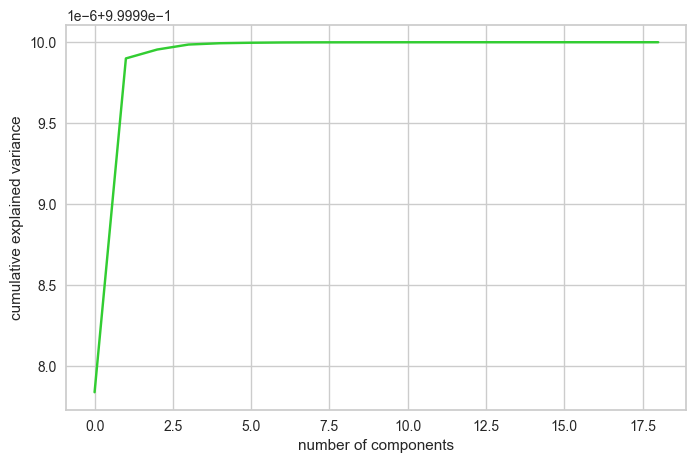

In [34]:
#initialize the pca with randomized
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=40)
pca.fit(X_train) # fit the training dataset
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

ca = PCA(n_components=3, random_state=40)
X_train_pca = pca.fit_transform(X_train) # fit and transform the training dataset
X_test_pca = pca.transform(X_test) #transform the testing dataset
X_pca = pca.fit_transform(X) # fit and transform the whole dataset

Feature: 0, Score: 0.05702
Feature: 1, Score: 0.05215
Feature: 2, Score: 0.05127
Feature: 3, Score: 0.05315
Feature: 4, Score: 0.05161
Feature: 5, Score: 0.05479
Feature: 6, Score: 0.05044
Feature: 7, Score: 0.05140
Feature: 8, Score: 0.05167
Feature: 9, Score: 0.05263
Feature: 10, Score: 0.05012
Feature: 11, Score: 0.05263
Feature: 12, Score: 0.05158
Feature: 13, Score: 0.05077
Feature: 14, Score: 0.05504
Feature: 15, Score: 0.05132
Feature: 16, Score: 0.05217
Feature: 17, Score: 0.05272
Feature: 18, Score: 0.05751


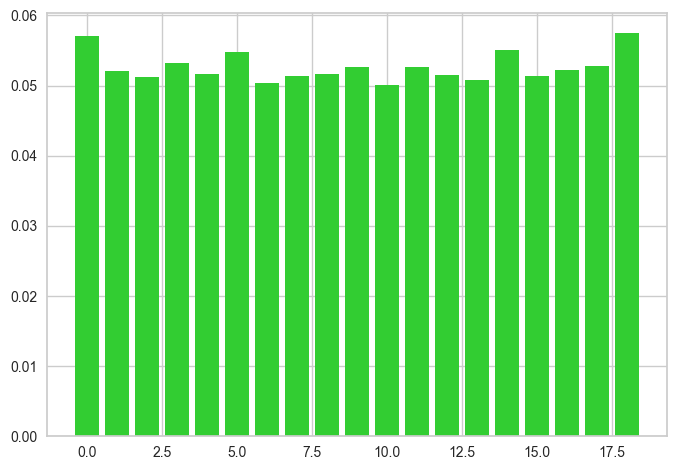

In [35]:
# random forest feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

importance = model.feature_importances_ # get importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) # summarize feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [36]:
# select independent variables
X = train.drop(columns='Churn')

# select dependent variables
y = train.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)
33

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'CustomerCareCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
       'IncomeGroup', 'AdjustmentsToCreditRating', 'CreditRating', 'PrizmCode',
       'Occupation'],
      dtype='object')
Churn


33

#  Importing the Models

In [37]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:
model_score_list = []
def evaluate_model(actual, pred):
    
    acc_score = round(accuracy_score(actual, pred)*100,2) # Accuracy Score
    print('Accuracy Score : ',acc_score)
    roc_score = round(roc_auc_score(actual, pred)*100,2) # ROC AUC score
    print('ROC AUC score : ',roc_score)
    
    prec_score = round(precision_score(actual, pred)*100,2) # Precision score
    print('Precision score : ', prec_score)
    rec_score = round(recall_score(actual, pred)*100,2) # Recall score
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [39]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', LinearSVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

## Model Training and Evaluation

In [40]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
model_score_list = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_pca, y_train).predict(X_test_pca)
    # make predictions with the testing data
    predictions = model.predict(X_test_pca)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)

    acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, predictions)
    model_score_list.append({'model_name':model, 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Accuracy Score :  71.25
ROC AUC score :  50.0
Precision score :  0.0
Recall score :  0.0
Classifier: dummy_classifier, Accuracy: 0.7125454366833677)


c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score :  65.43
ROC AUC score :  50.7
Precision score :  30.66
Recall score :  16.06
Classifier: k_nearest_neighbors, Accuracy: 0.654288240495137)
Accuracy Score :  53.27
ROC AUC score :  53.71
Precision score :  31.82
Recall score :  54.75
Classifier: logistic_regression, Accuracy: 0.532665291285981)


c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Score :  51.16
ROC AUC score :  49.25
Precision score :  28.07
Recall score :  44.74
Classifier: support_vector_machines, Accuracy: 0.5116416150898909)
Accuracy Score :  71.38
ROC AUC score :  51.82
Precision score :  51.99
Recall score :  5.81
Classifier: random_forest, Accuracy: 0.7138225758915414)
Accuracy Score :  71.31
ROC AUC score :  50.55
Precision score :  53.19
Recall score :  1.71
Classifier: gradient_boosting, Accuracy: 0.7131348855486787)


# Hyperparameter Tuning with Random Search

In [41]:
# define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

grid_parameters = {'n_estimators': [80, 90, 100],
                   'max_depth': [3, 4, 5],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [3, 4]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=3,
                                   n_iter=50,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train_pca, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 80, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 4}


In [42]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([[4910, 2343],
       [1896, 1030]], dtype=int64)

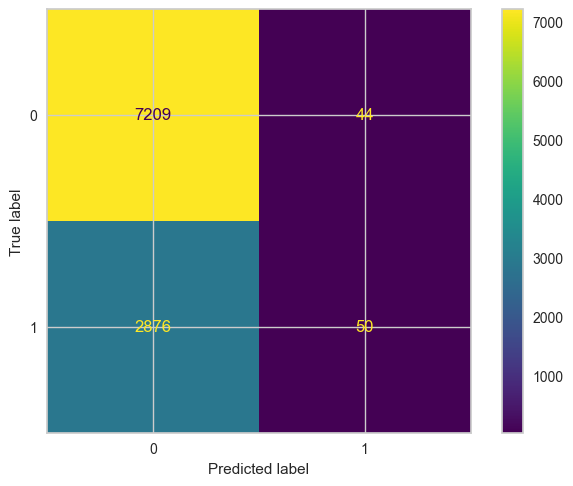

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=random_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=random_search.classes_)
disp.plot()
plt.show()

In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state = 40)

# Cross validation for RandomForestClassifier
model = RandomForestClassifier()
rf_cv_scores = cross_val_score(model, X_pca, y, scoring='accuracy', cv = skf, n_jobs=-1)
print('RandomForestClassifier cv_score_mean : ', round(rf_cv_scores.mean() * 100, 2))
print('RandomForestClassifier cv_score_std : ', round(rf_cv_scores.std() * 100, 2))

RandomForestClassifier cv_score_mean :  66.9
RandomForestClassifier cv_score_std :  0.41


## Select Best Model

In [45]:
# initialize the model with the best estimator
model = random_search.best_estimator_

model.fit(X_train_pca, y_train) # fit the pca training dataset
Y_pred = model.predict(X_test_pca) # Predict the model with the pca testing dataset

# get the predict probablities of pca testing dataset
Y_pred_proba = model.predict_proba(X_test_pca)

Y_pred_final = pd.DataFrame({'actual':y_test,'pred_nonchurn_prob':Y_pred_proba[:,0],'pred_churn_prob':Y_pred_proba[:,1],'predicted':Y_pred})
Y_pred_final.head(5)

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > i else 0)
Y_pred_final.head()

Y_pred_final['final_predicted'] = Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > 0.25 else 0)

In [46]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      7253
           1       0.31      0.35      0.33      2926

    accuracy                           0.58     10179
   macro avg       0.51      0.51      0.51     10179
weighted avg       0.60      0.58      0.59     10179



0.583554376657825

In [47]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, Y_pred_final['final_predicted']))
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred_final['final_predicted'])


Classification Report : 

               precision    recall  f1-score   support

           0       0.82      0.34      0.48      7253
           1       0.33      0.82      0.47      2926

    accuracy                           0.48     10179
   macro avg       0.58      0.58      0.48     10179
weighted avg       0.68      0.48      0.48     10179

Accuracy Score :  47.98
ROC AUC score :  58.04
Precision score :  33.44
Recall score :  81.72


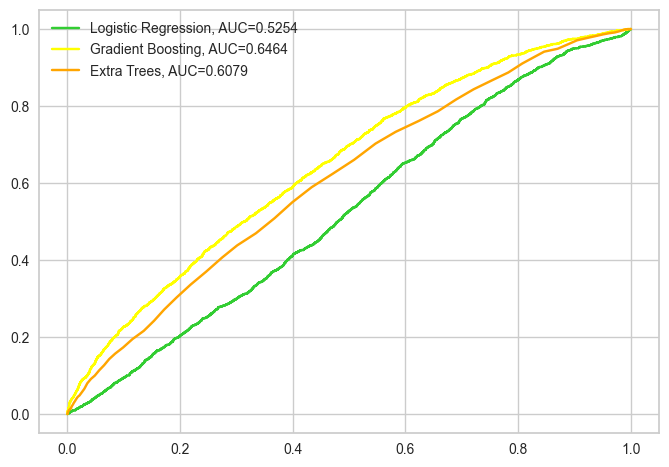

In [48]:
from sklearn import metrics
#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit extra trees model and plot ROC curve
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Extra Trees, AUC="+str(auc))

plt.legend()

## Additional Hyperparameter Tuning

>1 0.7123 (0.0016)
>2 0.7108 (0.0014)
>3 0.7104 (0.0025)
>4 0.7105 (0.0018)
>5 0.7099 (0.0022)


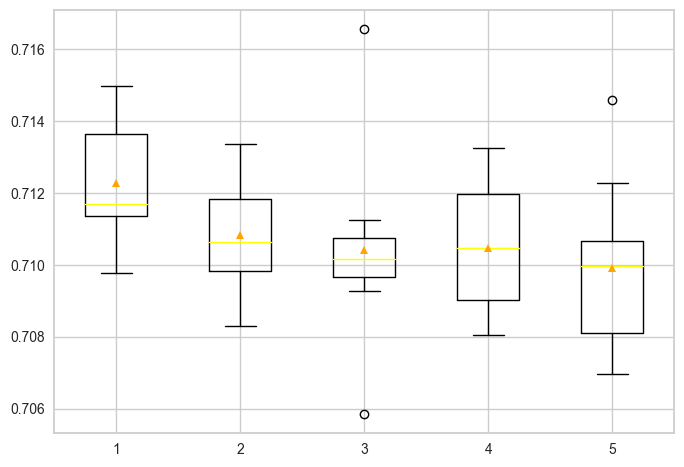

In [49]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

def get_models():
    models = dict()
    # explore number of features from 1 to 5
    for i in range(1,6):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # evaluate the model and collect the results
    return scores

models = get_models()

results, names = list(), list() # evaluate the models and store results
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train) # evaluate the model
    results.append(scores)# store the results
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores))) # summarize the performance along the way

pyplot.boxplot(results, labels=names, showmeans=True) # plot model performance for comparison
pyplot.show()

>50 0.7078 (0.0029)
>80 0.7097 (0.0028)
>120 0.7105 (0.0018)


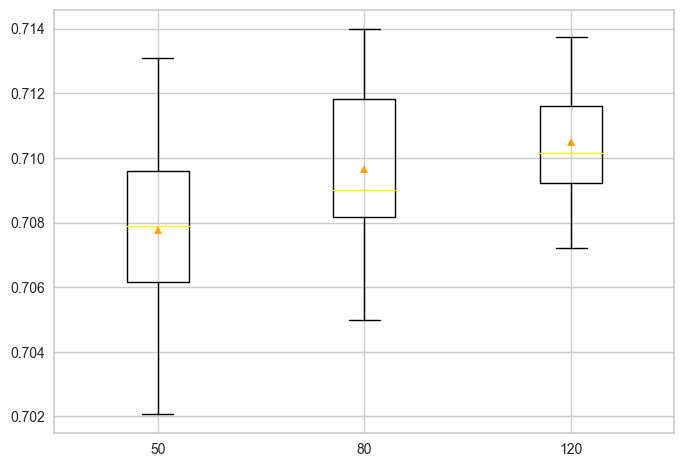

In [50]:
# explore random forest number of trees effect on performance
def get_models():
    models = dict()
    n_trees = [50, 80, 120] # define number of trees to consider
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # evaluate the model and collect the results
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train) # evaluate the model
    results.append(scores) # store the results
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.7122 (0.0000)
>2 0.7122 (0.0000)
>3 0.7122 (0.0000)
>4 0.7123 (0.0001)
>5 0.7123 (0.0004)
>None 0.7105 (0.0015)


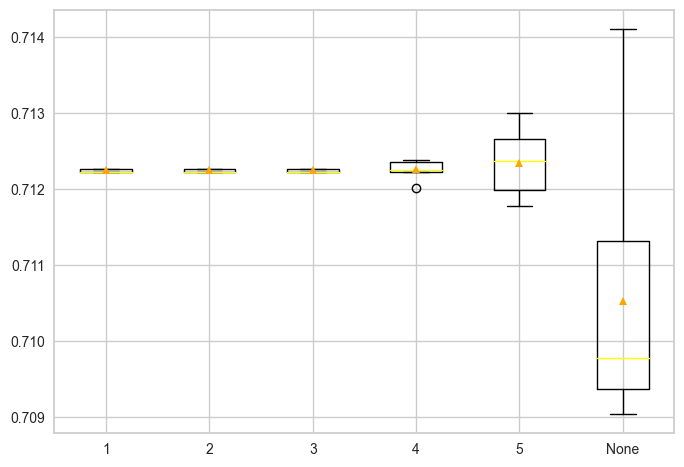

In [51]:
# explore random forest tree depth effect on performance
def get_models():
    models = dict()
    depths = [i for i in range(1,6)] + [None] # consider tree depths from 1 to 5 and None=full
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  # evaluate the model and collect the results
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###### Gain and Lift Charts

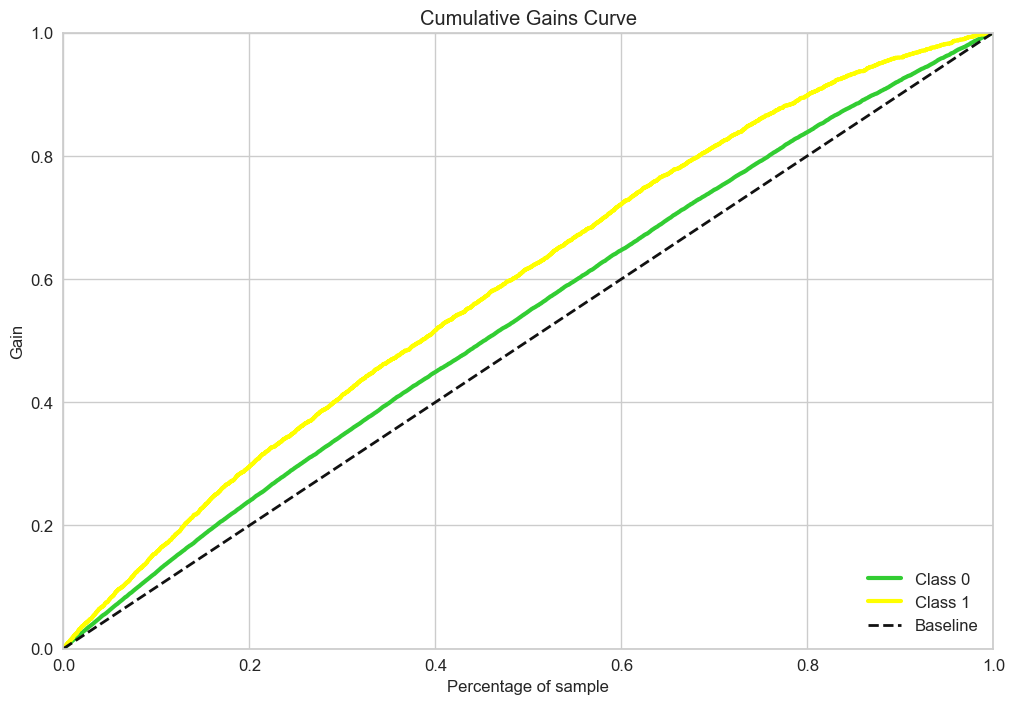

In [52]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, Y_pred_proba,figsize = (12,8))
plt.show()

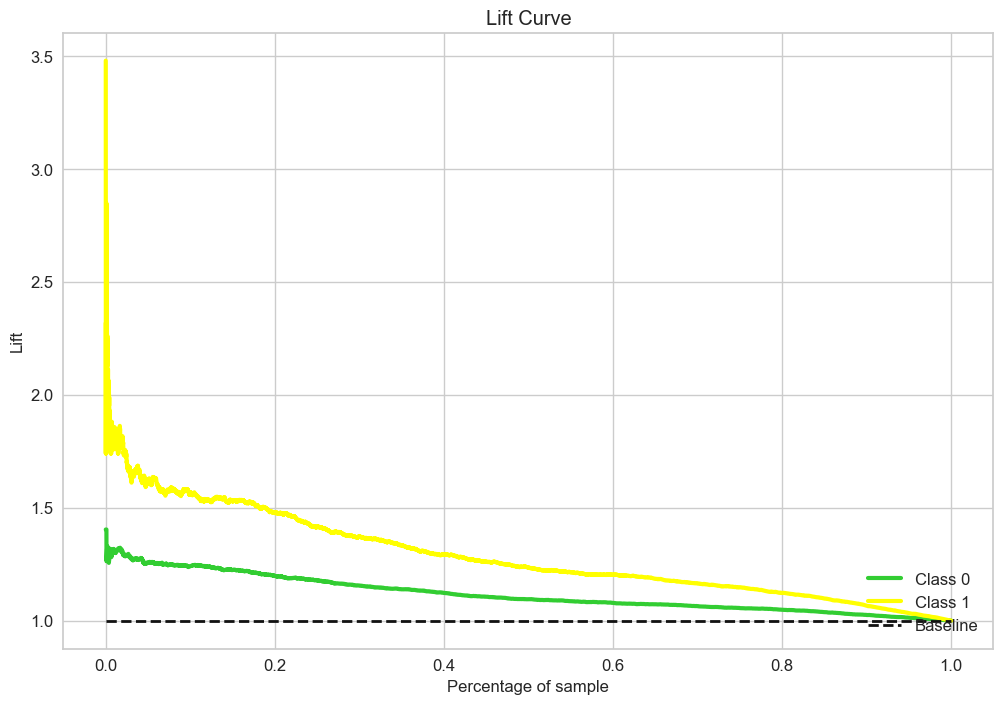

In [53]:
skplt.metrics.plot_lift_curve(y_test, Y_pred_proba, figsize = (12,8))
plt.show()

## Selecting Best model

###### Optimizing threshold

###### interpret model